In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [42]:
def find_max_betweenness(G):  
        betweenness = nx.edge_betweenness_centrality(G, k = None, normalized = True, weight = None)
        max_b_edges = []
        max_b = max(betweenness.items(), key = lambda x: x[1])  

        for (k, v) in betweenness.items():
            if v == max_b[1]:
                max_b_edges.append(k)  

        return max_b_edges

In [43]:
partitions = []
bet_list = []

def GN_partition(G):
    if len(G.nodes()) == 1:
        return list(G.nodes())[0]

    else:

        communities = set() 
        comp = nx.connected_components(G) 


    while nx.is_connected(G):
        betweenness = find_max_betweenness(G)
        G.remove_edges_from(betweenness)
        comp = nx.connected_components(G)
        t = tuple([*comp])

         
    print('New step:', t)

    comp = nx.connected_components(G)
    res = tuple([nx.Graph(G.subgraph(i)) for i in list(comp)])
        
          
    return [GN_partition(i) for i in res]
          

In [45]:
G = nx.karate_club_graph()
t = GN_partition(G)
for i in range(len(t)):
    print(f'Community {i}:', t[i])

New step: ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
New step: ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {4, 5, 6, 10, 16})
New step: ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {11})
New step: ({0, 1, 3, 7, 13, 17, 19, 21}, {12})
New step: ({0, 1, 3, 7, 13}, {17}, {19}, {21})
New step: ({0, 1, 3}, {7}, {13})
New step: ({0}, {1}, {3})
New step: ({10, 4}, {16, 5, 6})
New step: ({10}, {4})
New step: ({5}, {6}, {16})
New step: ({32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
New step: ({2, 24, 25, 27, 28, 31}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30})
New step: ({2, 27, 28}, {24, 25, 31})
New step: ({2}, {27}, {28})
New step: ({24}, {25}, {31})
New step: ({32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {26})
New step: ({32, 33, 8, 23, 29, 30}, {14}, {15}, {18}, {20}, {22})
New step: ({8, 30}, {29, 23}, {32, 33})
New step: ({8}, {30})
New step: ({29}, {23})
New step: ({32}, {33})
Co

In [27]:
G = nx.karate_club_graph()

In [28]:
pos = nx.spring_layout(G)

In [29]:
def g_draw(G):
    betweenness = nx.edge_betweenness_centrality(G, k = None, normalized = True, weight = None)
    b = sorted(betweenness.items(), key = lambda x: x[1], reverse=True)
    fr, to, val = [],[],[]
    for i in range(len(b)):
        fr.append(b[i][0][0])
        to.append(b[i][0][1])
        val.append(b[i][1])

    df = pd.DataFrame({ 'from':fr, 'to':to, 'value':val})
 
    G_t = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
    nx.draw(G_t, pos, with_labels = True, node_color = 'skyblue', node_size=300, edge_color = df['value'], width = 2.0, edge_cmap = plt.cm.PuRd)


    return G_t

In [ ]:
plt.figure()
g_draw(G)

while 1:
    try:
        plt.figure()

        betweenness = find_max_betweenness(G)
        G.remove_edges_from(betweenness)
        G = g_draw(G)
    except ValueError:
        break
    
    

<ipython-input-48-51d2da1a062c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


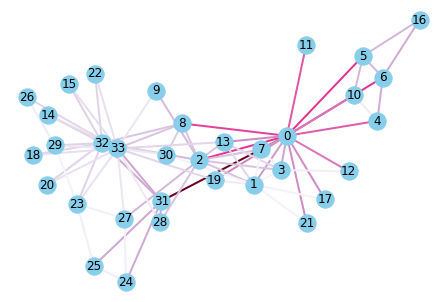

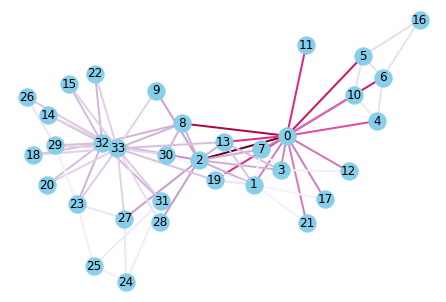

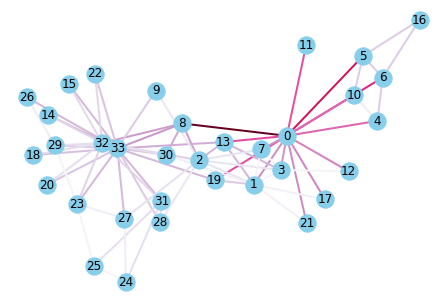

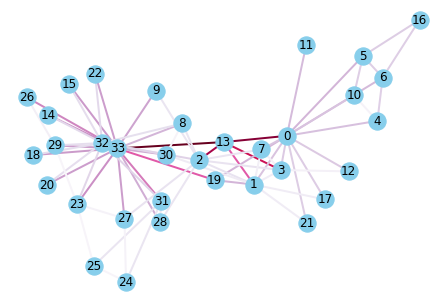

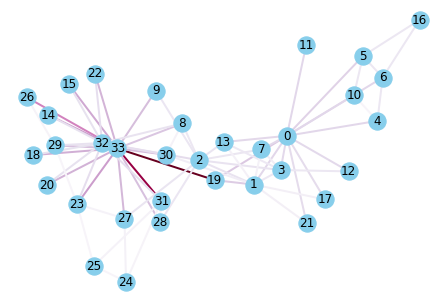

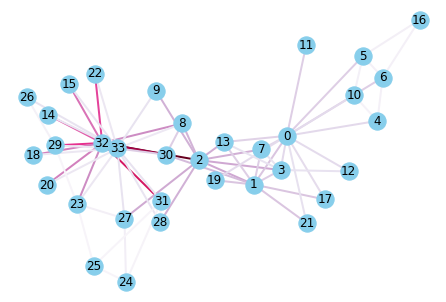

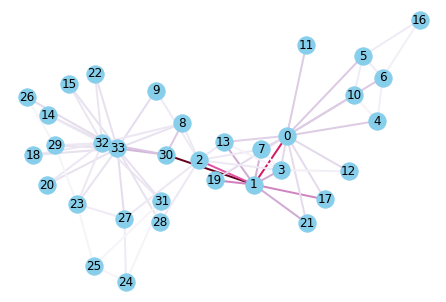

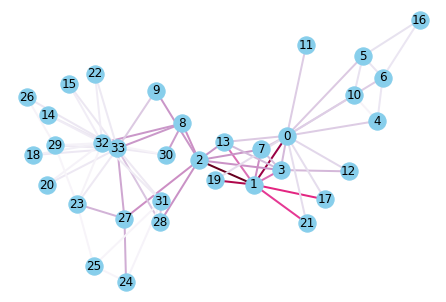

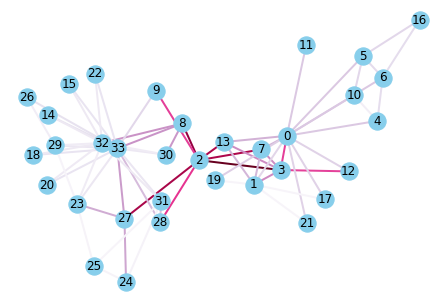

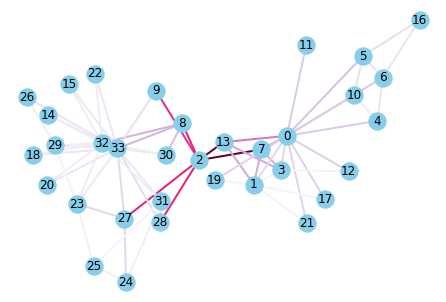

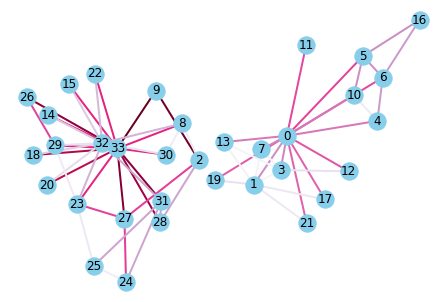

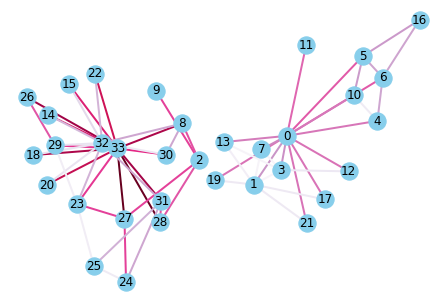

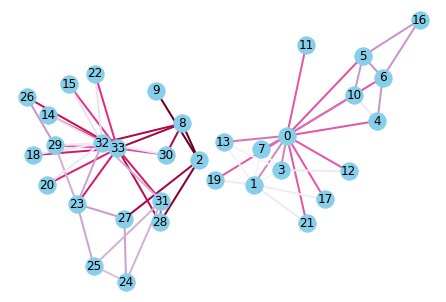

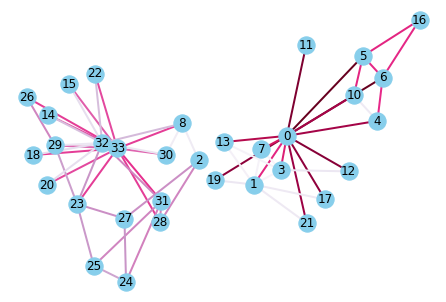

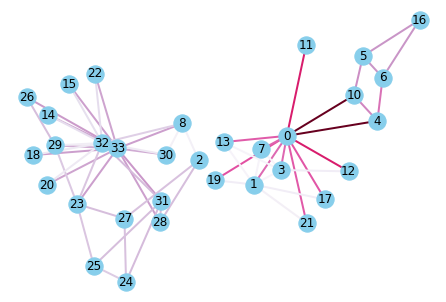

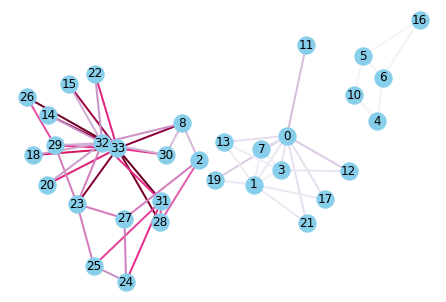

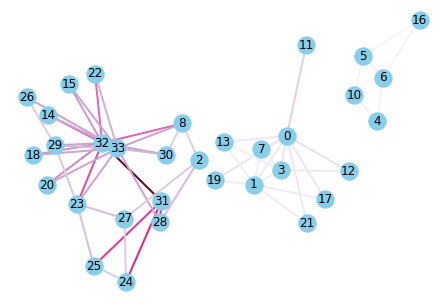

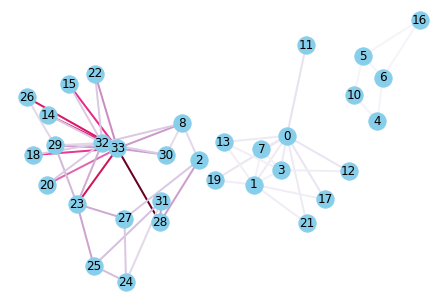

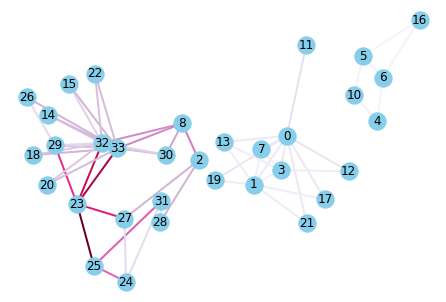

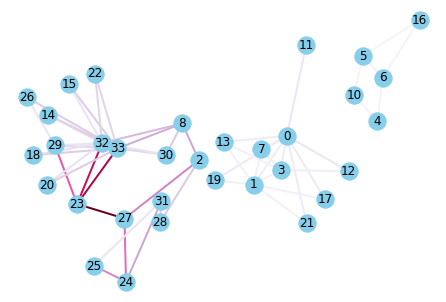

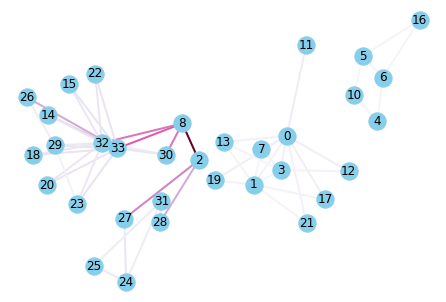

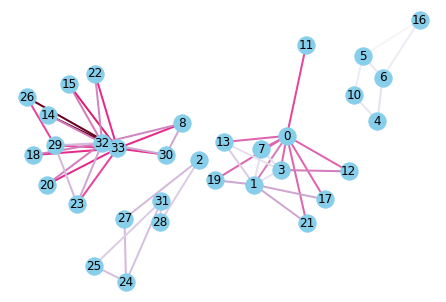

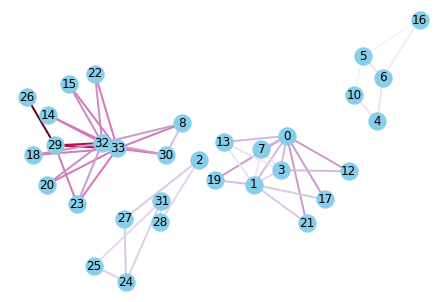

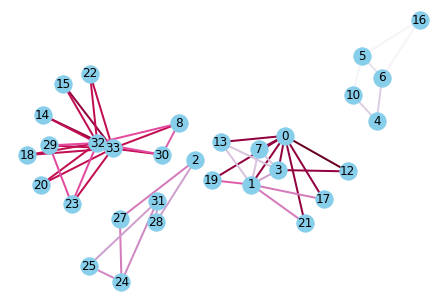

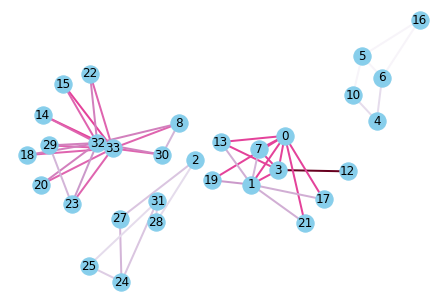

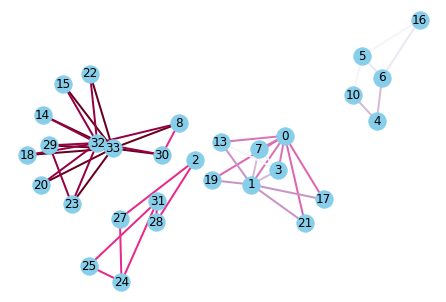

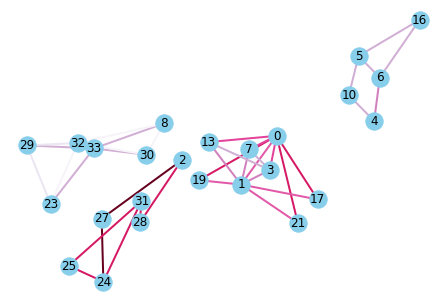

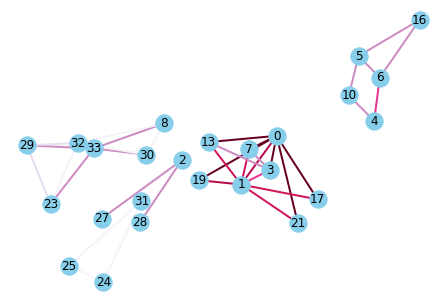

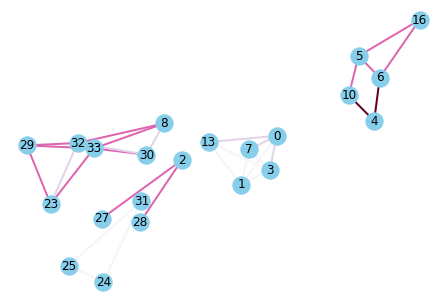

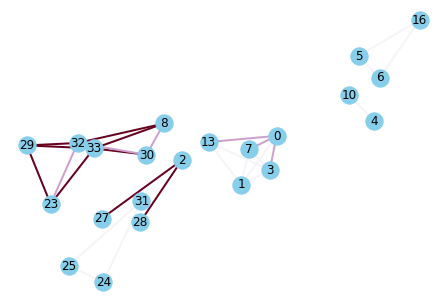

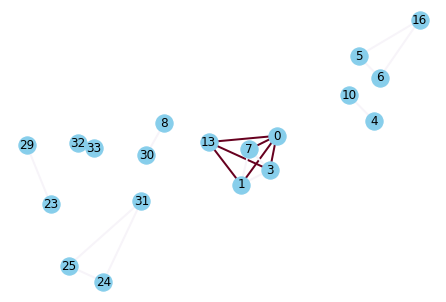

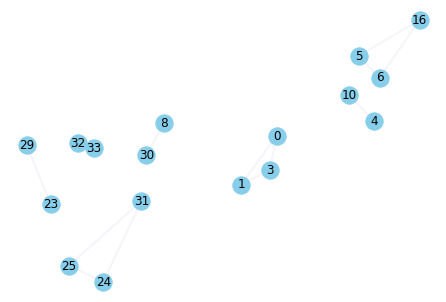

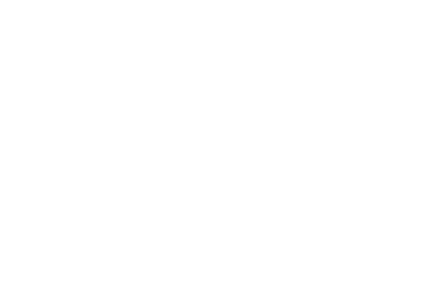

In [48]:
plt.figure()
g_draw(G)

for i in range(len(G)-2):
    plt.figure()
  
    betweenness = find_max_betweenness(G)
    G.remove_edges_from(betweenness)
    G = g_draw(G)

